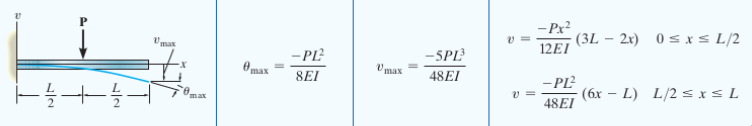

In [1]:
import sympy as sym

In [5]:
x = sym.symbols('x')

P, E, I, L = sym.symbols('P, E, I, L')

In [6]:
v1 = sym.Function('v_1')

In [28]:
M1 = -P*(L - x - L/2)

In [29]:
eq1 = sym.Eq(sym.diff(v1(x),(x,2)), M1/(E*I))
display(eq1)

Eq(Derivative(v_1(x), (x, 2)), -P*(L/2 - x)/(E*I))

In [30]:
bc11 = {v1(0): 0}

bc12 = {sym.diff(v1(x),x).subs(x,0): 0}

bc_list1 = bc11 | bc12
display(bc_list1)

{v_1(0): 0, Subs(Derivative(v_1(x), x), x, 0): 0}

In [31]:
diff_eq1_soln = sym.dsolve(eq1, v1(x), ics=bc_list1)
diff_eq1_soln.simplify()

Eq(v_1(x), P*x**2*(-3*L + 2*x)/(12*E*I))

In [32]:
v1_soln = diff_eq1_soln.rhs
display(v1_soln)

-L*P*x**2/(4*E*I) + P*x**3/(6*E*I)

In [33]:
v2 = sym.Function('v_2')

In [34]:
M2 = 0

In [35]:
eq2 = sym.Eq(sym.diff(v2(x),(x,2)), M2/(E*I))
display(eq2)

Eq(Derivative(v_2(x), (x, 2)), 0)

In [36]:
bc21 = {v2(L/2): v1_soln.subs(x,L/2)}

bc22 = {sym.diff(v2(x),x).subs(x,L/2): sym.diff(v1_soln,x).subs(x,L/2)}

bc_list2 = bc21 | bc22
display(bc_list2)

{v_2(L/2): -L**3*P/(24*E*I),
 Subs(Derivative(v_2(x), x), x, L/2): -L**2*P/(8*E*I)}

In [37]:
diff_eq2_soln = sym.dsolve(eq2, v2(x), ics=bc_list2)
diff_eq2_soln.simplify()

Eq(v_2(x), L**2*P*(L - 6*x)/(48*E*I))